In [17]:
import numpy as np

In [18]:
file = np.load('data/Gaussian_log_1/mclmc1.npz')

In [19]:
file['stepsize']

array([ 2.5      ,  2.6734493,  2.8589323,  3.0572844,  3.269398 ,
        3.4962277,  3.7387953,  3.9981914,  4.2755847,  4.5722237,
        4.8894424,  5.2286706,  5.5914354,  5.979367 ,  6.3942137,
        6.8378415,  7.312249 ,  7.819571 ,  8.362091 ,  8.942249 ,
        9.56266  , 10.226115 , 10.935601 , 11.694309 , 12.505659 ,
       13.373296 , 14.30113  , 15.293341 , 16.354385 , 17.489052 ,
       18.702435 , 20.000002 ], dtype=float32)

In [20]:
file['bias'].shape

(32, 4, 10000)

In [21]:
file['eevpd'].shape

(32, 4)

In [22]:
bias = np.median(np.min(file['bias'],axis = -1),axis=-1)
eevpd = np.median(file['eevpd'],axis=-1)

Text(0, 0.5, 'bias')

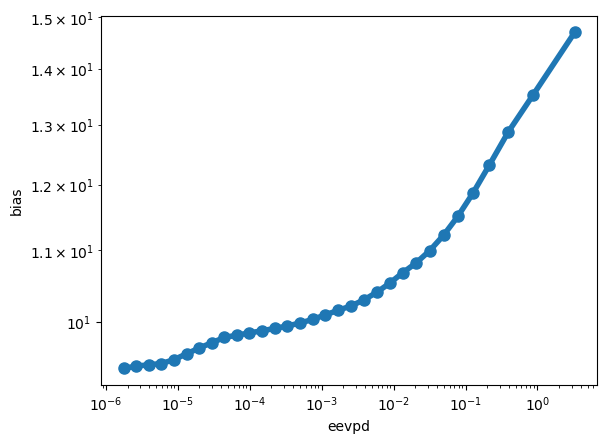

In [28]:
import matplotlib.pyplot as plt
plt.loglog(eevpd,np.sqrt(bias), 'o-', lw= 4, markersize = 8,)
#plt.loglog(eevpd,(eevpd/4)**(1/3), 'o-', lw= 4, markersize = 8,)
plt.xlabel('eevpd')
plt.ylabel('bias')